<a href="https://colab.research.google.com/github/Nivedita-24/Credit-Card-Fraud-Detection/blob/main/CreditCardFraudDectection_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting Credit Card Fraud using Tensorflow


## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import sklearn.model_selection as model_selection
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


##Importing the Dataset

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [4]:
CreditCard = pd.read_csv("/content/drive/My Drive/Colab Notebooks/CreditCardFraud/creditcard.csv")

In [5]:
print("Total no. of records in the dataset are", CreditCard.shape[0])
print("Total features in the dataset are", CreditCard.shape[1])
CreditCard.head()

Total no. of records in the dataset are 284807
Total features in the dataset are 31


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [6]:
## To check missing values in the dataset.
CreditCard.isnull().values.any() 

False

In [7]:
## Rename Class
CreditCard.rename(columns ={'Class': "isFraud"}, inplace = True)
CreditCard = CreditCard.applymap(lambda x: x.replace("'", "") if (isinstance(x, str)) else x)
CreditCard['isFraud'] = pd.to_numeric(CreditCard['isFraud'])

# fraudulent Transactions Percentage
fraud_per = CreditCard[CreditCard.isFraud == 1].isFraud.count() / CreditCard.isFraud.count()*100
print("Percentage of Fraudulent Transactions in the dataset are {:.2f} %".format(fraud_per))

Percentage of Fraudulent Transactions in the dataset are 0.17 %


We got the dataset from Kaggle and it contains two days worth of transactions by European cardholders. Due to confidential nature of the data, a PCA transformation was done on 28 features and we have no information on what those features are. The only features that haven't undergone this transformation and we can identify them are 'Time', 'Amount', and 'Class'.

Time represents the seconds elapsed between each transaction and the first transaction in the dataset. 'Amount denotes the amount of transaction anjd 'Class' refers to out target variable with 0 referring to a normal transaction and 1 referring to a fraudulent one.

It is important to note here that the target variable's instances are imbalanced. Only 0.17% of transactions are fraudulent.


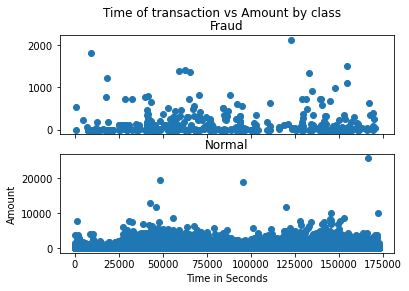

In [8]:
## Do fraudulent transactions occur more often during certain time?
f, (ax1, ax2) = plt.subplots(2,1, sharex = True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(CreditCard[CreditCard.isFraud == 1].Time, CreditCard[CreditCard.isFraud == 1].Amount)
ax1.set_title('Fraud')

ax2.scatter(CreditCard[CreditCard.isFraud == 0].Time, CreditCard[CreditCard.isFraud == 0].Amount)
ax2.set_title('Normal')

plt.xlabel('Time in Seconds')
plt.ylabel('Amount')
plt.show()

Doesn't seem like the time of transaction really matters.

##Data PreProcessing

In [9]:
## Defining x and y
X = CreditCard.iloc[:,:-1].values
y = CreditCard.iloc[:,-1].values

In [10]:
## Defining training and tesing set
## Train-Test split

from sklearn.model_selection import train_test_split
 
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
 
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (227845, 30)
Number transactions y_train dataset:  (227845,)
Number transactions X_test dataset:  (56962, 30)
Number transactions y_test dataset:  (56962,)


In [11]:
## Standardising the dataset as this would speedup the training process

## Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

As mentioned previously, this dataset is highly imbalanced. We'll address this issue using Synthetic Minority Oversampling Technique (SMOTE). This technique creates artificial minority class samples by replicating them. In this case it will create synthetic fraud instances and so corrects the imbalance in our dataset.

In [12]:
## SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
 
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454908, 30)
After OverSampling, the shape of train_y: (454908,) 

After OverSampling, counts of label '1': 227454
After OverSampling, counts of label '0': 227454


##Building the ANN

###Initializing the ANN

In [13]:
ann = tf.keras.models.Sequential()

###Adding the input layer and first hidden layer

In [14]:
ann.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))

###Adding the second hidden layer

In [15]:
ann.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))

###Adding the third hidden layer

In [16]:
ann.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

###Adding the fouth hidden layer

In [17]:
ann.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))

###Adding the Fifth Hidden layer

In [18]:
ann.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))

###Adding the Sixth Hidden layer

In [19]:
ann.add(tf.keras.layers.Dense(units = 16, activation = 'relu'))

###Adding the output layer

In [20]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

##Training the ANN

###Compiling the ANN

In [21]:
metrics = [
    tf.keras.metrics.Accuracy(name = "Accuracy"),
    tf.keras.metrics.Precision(name = "Precision"),
    tf.keras.metrics.Recall(name ="Recall")]
# hp_learning_rate = hp.Choice('learning_rate', values = [0.005, 0.01, 0.05])       
ann.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002), loss = 'binary_crossentropy',metrics = metrics)

###Training the ANN on the Training set

In [22]:
history = ann.fit(X_train_res, y_train_res, batch_size=32, epochs=100)

Epoch 1/100
14216/14216 [==============================] - 50s 3ms/step - loss: 0.0128 - Accuracy: 0.1130 - Precision: 0.9963 - Recall: 0.9969
Epoch 2/100
14216/14216 [==============================] - 51s 4ms/step - loss: 0.0036 - Accuracy: 0.1356 - Precision: 0.9990 - Recall: 0.9995
Epoch 3/100
14216/14216 [==============================] - 51s 4ms/step - loss: 0.0027 - Accuracy: 0.1538 - Precision: 0.9993 - Recall: 0.9995
Epoch 4/100
14216/14216 [==============================] - 51s 4ms/step - loss: 0.0020 - Accuracy: 0.2190 - Precision: 0.9995 - Recall: 0.9996
Epoch 5/100
14216/14216 [==============================] - 51s 4ms/step - loss: 0.0017 - Accuracy: 0.2595 - Precision: 0.9996 - Recall: 0.9997
Epoch 6/100
14216/14216 [==============================] - 50s 4ms/step - loss: 0.0013 - Accuracy: 0.2935 - Precision: 0.9997 - Recall: 0.9998
Epoch 7/100
14216/14216 [==============================] - 50s 4ms/step - loss: 0.0014 - Accuracy: 0.3038 - Precision: 0.9997 - Recall: 0.9998

##Making the predictions and evaluating the model

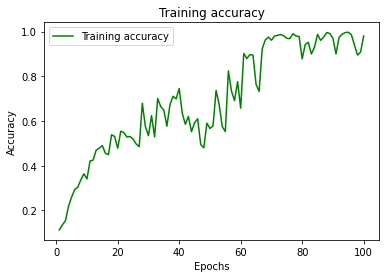

In [24]:
# Evaluating the model 
loss_train = history.history['Accuracy']
# loss_val = history.history['val_accuracy']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
# plt.plot(epochs,loss_val, 'b', label='validation accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Predicting the Test set results

In [25]:
y_pred = ann.predict(X_test)
y_pred = (y_pred>0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


###Making the Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("F1_Score: " ,f1_score(y_test, y_pred))

[[56844    17]
 [   19    82]]
Accuracy:  0.9993679997191109
Recall:  0.8118811881188119
Precision:  0.8282828282828283
F1_Score:  0.8200000000000001
